<a href="https://colab.research.google.com/github/venkatesh-eranti/clustering_Bank-Telemarketing-Campaign-Case-Study/blob/main/clustering_Bank_Telemarketing_Campaign_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset and required libraries

In [159]:
data='https://raw.githubusercontent.com/venkatesh-eranti/EDA_Bank-Telemarketing-Campaign-Case-Study/main/bank_marketing_dataset.csv'

## importing the required libraries

In [3]:
! pip install kmodes

In [4]:
import numpy as np
import pandas as pd
# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# supress warnings
import warnings
warnings.filterwarnings('ignore')
# clustering
from kmodes.kprototypes import KPrototypes
# categorical data to numerica
from sklearn.preprocessing import LabelEncoder

## loading the data

In [273]:
df=pd.read_csv(data)
Attribute_details=pd.read_excel('Attribute details.xlsx')

# Understanding the data

In [ ]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


first two rows are summary rows. so those are not required

In [161]:
df=pd.read_csv(data,skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [162]:
df.shape

(45211, 19)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

seems there are many objects --> need to convert those to numbers <br>
need to impute/ remove missing values

## reading the attribute dataset to get the description of each column

In [274]:
Attribute_details.head()

,Attributes details,Unnamed: 1
0,Customer id,This column is about the id of the customer co...
1,age,This column consists of the age of each customer
2,salary,This column represents monthly salary of the c...
3,balance,This column represents the cash balance in the...
4,marital,This column consists of the information about...


as the desciption column in truncated we can print it explicitly

In [ ]:
for rows in range(len(Attribute_details)):
    print(Attribute_details.iloc[rows,0],'-->',Attribute_details.iloc[rows,1])

# cleansing the data

## identify the data types

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

## fixing the rows

In [166]:
# converting duration column to numeric
df['duration'].apply(lambda x:x.split()[1]).value_counts()

min    31096
sec    14115
Name: duration, dtype: int64

In [167]:
# as most of the data is in minutes, all the duration to be converted to minutes
df['duration'][df['duration'].apply(lambda x:x.split()[1]=='sec')]=df['duration'][df['duration'].apply(lambda x:x.split()[1]=='sec')].apply(lambda x:float(x.split()[0])/60)

In [168]:
def min_strip(x):
    try:
        if x.split()[1]=='min':
            return float(x.split()[0])
    except:
        return x

In [169]:
df['duration']=df['duration'].apply(min_strip)

In [170]:
df['duration'].dtype

dtype('float64')

## fixing the columns

In [171]:
df.drop('customerid',axis=1,inplace=True)

In [172]:
# splitting jobedu column as job and edu
df['job']=df['jobedu'].apply(lambda x:x.split(',')[0])
df['education']=df['jobedu'].apply(lambda x:x.split(',')[1])

In [173]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [174]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

dropping jobedu column from dataframe

In [175]:
df.drop('jobedu',axis=1,inplace=True)

In [176]:
# day is not useful for our study. so dropping that column
df.drop('day',axis=1,inplace=True)

need to check if all the data is for same year or not if all are from same year we can remove the year from the month.<br>
if not we can retain the year also month has some null values and 

In [177]:
df['month'][~df['month'].isnull()].apply(lambda x:x.split(',')[1]).value_counts()

 2017    45161
Name: month, dtype: int64

In [178]:
df['month'][~df['month'].isnull()]=df['month'][~df['month'].isnull()].apply(lambda x:x.split(',')[0])

In [179]:
df['month'].value_counts()

may    13747
jul     6888
aug     6240
jun     5335
nov     3968
apr     2931
feb     2646
jan     1402
oct      738
sep      576
mar      476
dec      214
Name: month, dtype: int64

In [180]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,may,1.266667,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,may,1.533333,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,may,3.300000,1,-1,0,unknown,no,unknown,unknown


In [181]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

pdays represents: This column represents  the no of days passed by since the customer has been reached via bank for any of the other products (not term deposit). Here, the value ‘-1’ represents that the customer has never been reached for any product

as this `-1` spoils my analysis i will replace this -1 as nan so that this wont come in my analysis

In [182]:
df['pdays'][df['pdays']==-1]=df['pdays'][df['pdays']==-1]=np.nan

In [183]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# imputing or removing the missing values

In [184]:
df.isnull().sum()

age             20
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
month           50
duration         0
campaign         0
pdays        36954
previous         0
poutcome         0
response        30
job              0
education        0
dtype: int64

as `response` feature is more important for this case study and missing values are also only 30 (i.e., 0.06%) i am going to remove these missing values

In [185]:
df=df[~df['response'].isnull()]

as `age` is continuous variable i am going to impute this missing data as mean of age

In [186]:
df['age'].fillna(df['age'].mean(),inplace=True)

as `month` is categorical variable i am going to impute these missing data with mode of this feature

In [187]:
df['month'].fillna('may',inplace=True)

In [188]:
df['month'][df['month'].isnull()]=df['month'].mode()

In [189]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
month            0
duration         0
campaign         0
pdays        36930
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

# handling Outliers

In [190]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,age,salary,balance,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,8251.000000,45181.000000
mean,40.935763,57005.046369,1362.689936,4.302462,2.763352,224.596170,0.580355
std,10.616439,32089.163369,3045.584521,4.292520,3.096578,115.352191,2.303987
min,18.000000,0.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,1.716667,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,3.000000,2.000000,195.000000,0.000000
75%,48.000000,70000.000000,1428.000000,5.316667,3.000000,327.000000,0.000000
90%,56.000000,100000.000000,3575.000000,9.116667,5.000000,363.000000,2.000000
95%,59.000000,100000.000000,5769.000000,12.516667,8.000000,370.000000,3.000000
99%,71.000000,120000.000000,13169.200000,21.156667,16.000000,531.500000,9.000000


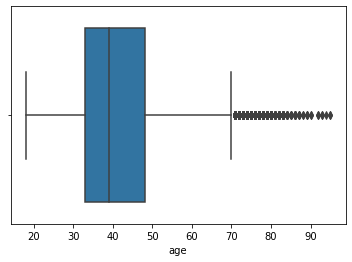

In [191]:
sns.boxplot(df['age'])

In [192]:
df['age'][df['age']>70].count()

487

only 480+ people are more than 70+ age seems age feature dont have any oulier

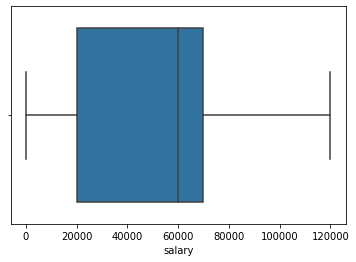

In [193]:
sns.boxplot(df['salary'])

1) for `balance` there are some negative values and in banking sector negative balance doesn't seem to be erroneous <br> 2) and there is a big difference between mean(1362) and median (448) <br> 3) 75% to max and even 99% to max also having huge jump.<br>
seems to have some outliers in this feature

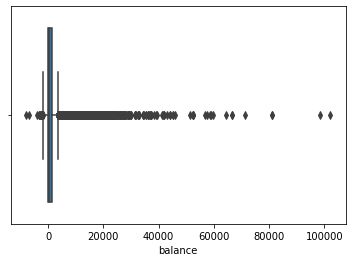

In [194]:
sns.boxplot(df['balance'])

seems to have higher values but rather a continuous values. so lets check summary of values greater than 99% percentiles

In [195]:
df[df['balance']>14000].describe()

,age,salary,balance,duration,campaign,pdays,previous
count,392.000000,392.000000,392.000000,392.000000,392.000000,65.000000,392.000000
mean,45.081633,69278.061224,23264.767857,4.286012,2.760204,187.261538,0.515306
std,12.130091,33905.264864,11866.261899,4.113635,3.070135,116.471466,1.707444
min,23.000000,0.000000,14004.000000,0.016667,1.000000,31.000000,0.000000
25%,34.000000,50000.000000,16430.000000,1.662500,1.000000,97.000000,0.000000
50%,44.000000,60000.000000,19841.500000,2.941667,2.000000,168.000000,0.000000
75%,55.000000,100000.000000,24802.500000,5.304167,3.000000,245.000000,0.000000
max,84.000000,120000.000000,102127.000000,27.050000,31.000000,589.000000,23.000000


after 14000 balance all the people are from higher age group and higher salary bracket. so these values doen't seem as erroneous

# Univariate analysis

## plotting Nominal variables (un-ordered categorical variables)

In [196]:
df.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,NaN,0,unknown,no,technician,secondary


In [197]:
df['marital'].value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

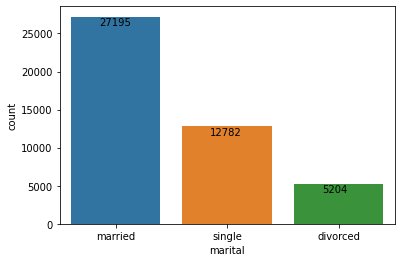

In [198]:
sns.countplot(df['marital'])
for i,v in enumerate(df['marital'].value_counts()):
    plt.text(i-.15,v-1100,str(v))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

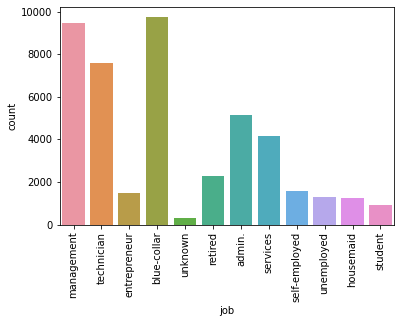

In [199]:
sns.countplot(df['job'])
plt.xticks(rotation=90)

## plotting ordinal features (ordered categorical features)

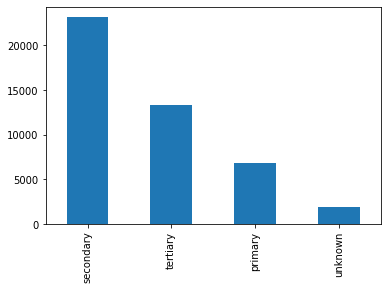

In [200]:
df['education'].value_counts().plot.bar()

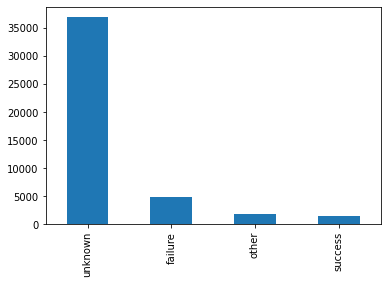

In [201]:
df['poutcome'].value_counts().plot.bar()

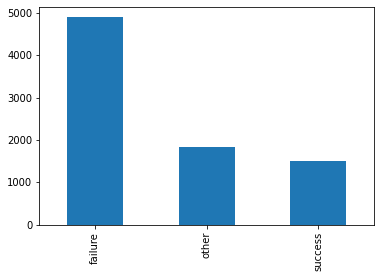

In [202]:
# removing unknown and plotting again
df['poutcome'][~(df['poutcome']=='unknown')].value_counts().plot.bar()

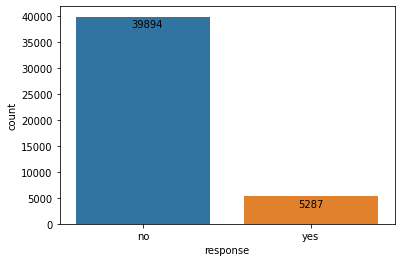

In [203]:
sns.countplot(df['response'])
for i,v in enumerate(df['response'].value_counts()):
    plt.text(i-.075,v-2000,str(v))

# Bivariate analysis

## Numerical-Numerical

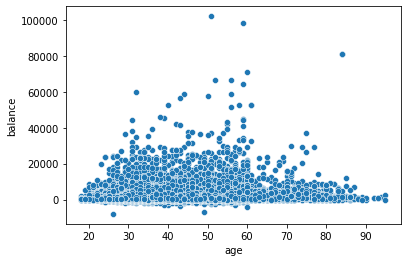

In [204]:
sns.scatterplot(df['age'],df['balance'])

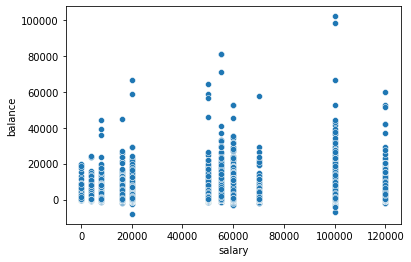

In [205]:
sns.scatterplot(df['salary'],df['balance'])

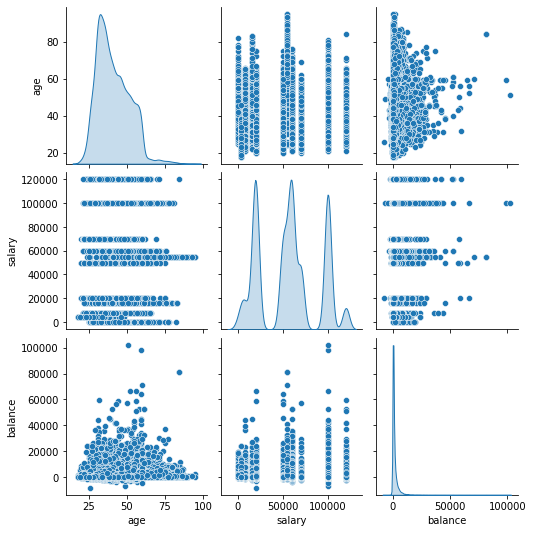

In [206]:
sns.pairplot(df[['age','salary','balance']],diag_kind='kde')

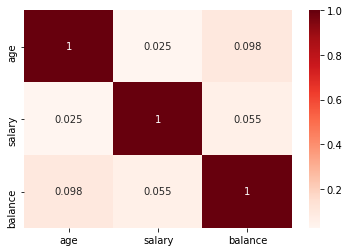

In [207]:
sns.heatmap(df[['age','salary','balance']].corr(),annot=True,cmap='Reds')

## Numerical - Categorical

In [208]:
response_group=df.groupby('response')
response_group['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [209]:
response_group['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

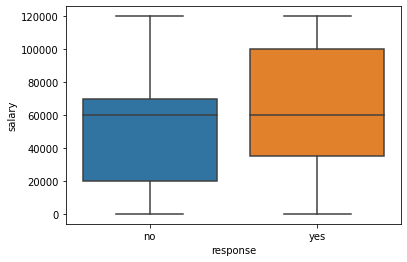

In [210]:
sns.boxplot(df['response'],df['salary'])

for response yes and no the medians are same but the number of people who responded yes, majority of their salaries have more than 60000. <br>
the number of people who responded NO,majority of their salaries have less than 60000

In [211]:
response_group['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [212]:
response_group['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

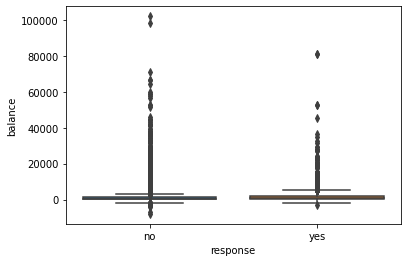

In [213]:
sns.boxplot(df['response'],df['balance'])

In [214]:
def p75(x):
    return np.percentile(x,75)
df.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.094525,417,1345.0
yes,1804.832041,733,2159.5


In [215]:
df.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


In [216]:
df.groupby('education')['salary'].aggregate(['mean','median'])

,mean,median
education,,
primary,34220.192870,20000
secondary,49739.143559,55000
tertiary,82875.564249,100000
unknown,46529.633621,50000


In [217]:
df.groupby('education')['response'].value_counts(normalize=True)

education  response
primary    no          0.913647
           yes         0.086353
secondary  no          0.894390
           yes         0.105610
tertiary   no          0.849910
           yes         0.150090
unknown    no          0.864224
           yes         0.135776
Name: response, dtype: float64

In [218]:
df.groupby('job')['salary'].mean().sort_values(ascending=False)

job
entrepreneur     120000
management       100000
services          70000
technician        60000
self-employed     60000
retired           55000
admin.            50000
blue-collar       20000
housemaid         16000
unemployed         8000
student            4000
unknown               0
Name: salary, dtype: int64

# categorical - categorical

In [219]:
df['response_flag']=df['response'].replace({'no':0,'yes':1})

In [220]:
df.groupby('education')['response_flag'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

Text(0, 0.5, 'response %')

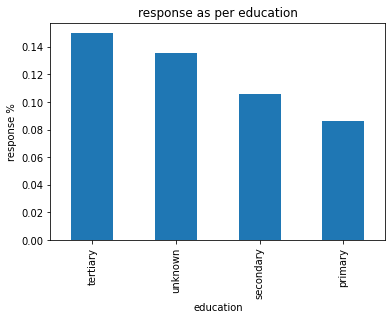

In [221]:
df.groupby('education')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per education')
plt.ylabel('response %')

In [222]:
df.groupby('marital')['response_flag'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

Text(0, 0.5, 'response %')

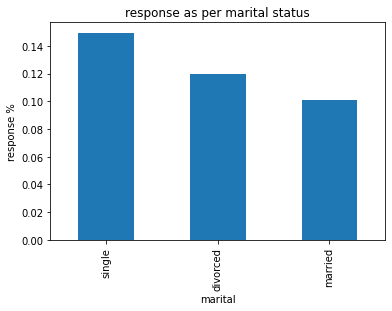

In [223]:
df.groupby('marital')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per marital status')
plt.ylabel('response %')

In [224]:
df.groupby('loan')['response_flag'].mean()

loan
no     0.126585
yes    0.066869
Name: response_flag, dtype: float64

Text(0, 0.5, 'response %')

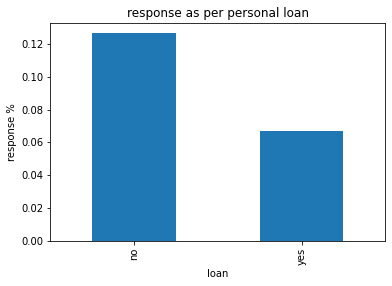

In [225]:
df.groupby('loan')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per personal loan')
plt.ylabel('response %')

In [226]:
df.groupby('housing')['response_flag'].mean()

housing
no     0.167074
yes    0.077015
Name: response_flag, dtype: float64

Text(0, 0.5, 'response %')

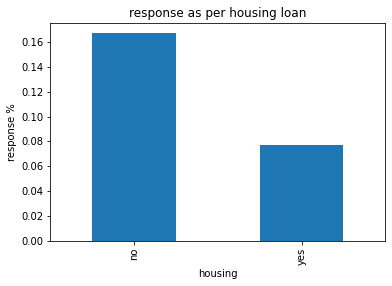

In [227]:
df.groupby('housing')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per housing loan')
plt.ylabel('response %')

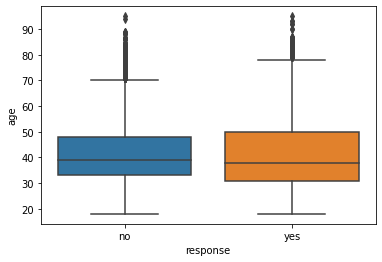

In [228]:
sns.boxplot(df['response'],df['age'])

In [229]:
df.groupby(['response'])['age'].mean()

response
no     40.838869
yes    41.666895
Name: age, dtype: float64

In [230]:
df.groupby(['response'])['age'].median()

response
no     39.0
yes    38.0
Name: age, dtype: float64

In [231]:
df['age_bucket']=pd.cut(df['age'],bins=[0,30,40,50,60,70,100],labels=['<30','<40','<50','<60','<70','<100'])

In [232]:
df.drop('age',axis=1,inplace=True)

In [233]:
df.groupby('age_bucket')['response_flag'].mean()

age_bucket
<30     0.162847
<40     0.102537
<50     0.090747
<60     0.100410
<70     0.406295
<100    0.447639
Name: response_flag, dtype: float64

Text(0, 0.5, 'response %')

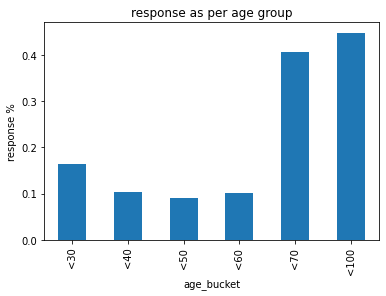

In [234]:
df.groupby('age_bucket')['response_flag'].mean().plot.bar()
plt.title('response as per age group')
plt.ylabel('response %')

# Multivariate analysis

In [235]:
df.columns

Index(['salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'job', 'education', 'response_flag',
       'age_bucket'],
      dtype='object')

In [236]:
df[['education','marital','response_flag']].corr()

,response_flag
response_flag,1.0


In [237]:
ed_mar=pd.pivot_table(data=df,index='education',columns='marital',values='response_flag')
ed_mar

marital,divorced,married,single
education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


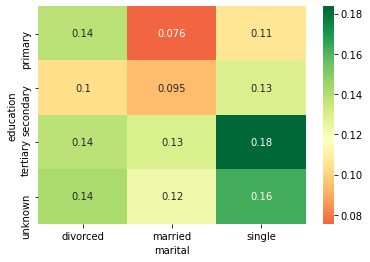

In [238]:
sns.heatmap(ed_mar,annot=True,cmap='RdYlGn',center=df['response_flag'].mean())

In [239]:
df['response_flag'].mean()

0.11701821562161085

In [240]:
job_mar=pd.pivot_table(data=df,index='job',columns='marital',values='response_flag')
job_mar

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136074
blue-collar,0.077437,0.062751,0.105760
entrepreneur,0.083799,0.075701,0.113924
housemaid,0.097826,0.073546,0.166667
management,0.127813,0.126205,0.162199
retired,0.285377,0.220682,0.120370
self-employed,0.157143,0.079637,0.191874
services,0.091075,0.074074,0.117696
student,0.166667,0.185185,0.293850


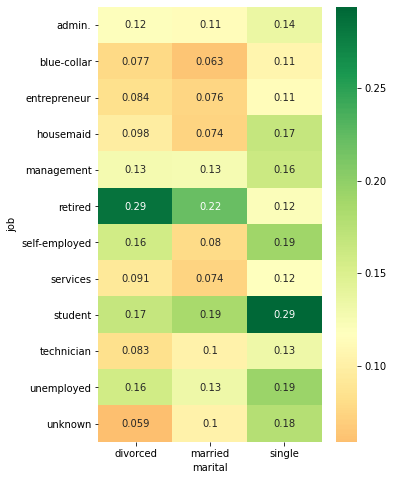

In [241]:
plt.figure(figsize=(5,8))
sns.heatmap(job_mar,annot=True,cmap='RdYlGn',center=df['response_flag'].mean())

In [242]:
df.head()

,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_bucket
0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,NaN,0,unknown,no,management,tertiary,0,<60
1,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,NaN,0,unknown,no,technician,secondary,0,<50
2,120000,2,married,yes,no,yes,yes,unknown,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,<40
3,20000,1506,married,no,no,yes,no,unknown,may,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,<50
4,0,1,single,no,no,no,no,unknown,may,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,<40


In [243]:
df.drop(['response','response_flag'],axis=1,inplace=True)

In [255]:
df.drop('pdays',axis=1,inplace=True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45181 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   salary      45181 non-null  int64   
 1   balance     45181 non-null  int64   
 2   marital     45181 non-null  object  
 3   targeted    45181 non-null  object  
 4   default     45181 non-null  object  
 5   housing     45181 non-null  object  
 6   loan        45181 non-null  object  
 7   contact     45181 non-null  object  
 8   month       45181 non-null  object  
 9   duration    45181 non-null  float64 
 10  campaign    45181 non-null  int64   
 11  previous    45181 non-null  int64   
 12  poutcome    45181 non-null  object  
 13  job         45181 non-null  object  
 14  education   45181 non-null  object  
 15  age_bucket  45181 non-null  category
dtypes: category(1), float64(1), int64(4), object(10)
memory usage: 6.8+ MB


# building a model of KPrototypes

## converting DataFrame to numpy format as it KPrototypes takes only numpy arrays

In [257]:
X=df.values

## finding optimal K's by using elbow methos

In [262]:
elbow_cost=[]
for i in range(2,9):
    kproto=KPrototypes(n_clusters=i,max_iter=10)
    kproto.fit_predict(X,categorical=[2,3,4,5,6,7,8,12,13,14,15])
    elbow_cost.append(kproto.cost_)

Text(0.5, 1.0, 'Optimal number of clusters by elbow-method')

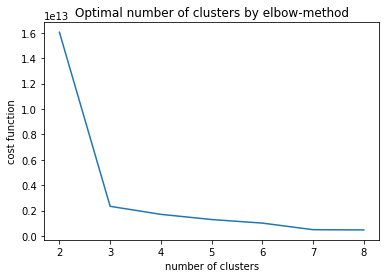

In [266]:
sns.lineplot(x=range(2,9),y=elbow_cost)
plt.xlabel('number of clusters')
plt.ylabel('cost function')
plt.title('Optimal number of clusters by elbow-method')

## building final model with 3 clusters

In [268]:
kproto=KPrototypes(n_clusters=3,max_iter=10)
kproto_clusters=kproto.fit_predict(X,categorical=[2,3,4,5,6,7,8,12,13,14,15])
kproto_clusters

array([0, 1, 0, ..., 1, 2, 0], dtype=uint16)

In [269]:
df['cluster_label']=kproto_clusters

In [270]:
df.head()

,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,previous,poutcome,job,education,age_bucket,cluster_label
0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,0,unknown,management,tertiary,<60,0
1,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,0,unknown,technician,secondary,<50,1
2,120000,2,married,yes,no,yes,yes,unknown,may,1.266667,1,0,unknown,entrepreneur,secondary,<40,0
3,20000,1506,married,no,no,yes,no,unknown,may,1.533333,1,0,unknown,blue-collar,unknown,<50,2
4,0,1,single,no,no,no,no,unknown,may,3.300000,1,0,unknown,unknown,unknown,<40,2


In [271]:
df['cluster_label'].value_counts()

1    20746
2    13495
0    10940
Name: cluster_label, dtype: int64